# Project: Investigate a Dataset - [noshowappointments-kagglev2-may-2016 ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointments. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
>What are the age and gender of the most people present?

>Do the attendants suffer from hypertension and diabetes ?

> Do the attendants suffer from alcoholism or are handicapped ?

> Do the attendants have a scholarship ?

> Is our campaign good enough in those cities ?

# Data Wrangling

>I will assess and clean ,
I will delete the duplicated rows and clean them , 
I will delete the unneccessary columns, 
I will start exploration process.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sbs
%matplotlib inline

In [2]:
df = pd.read_csv('D:/data science/dataset kaggle/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>i was extracting the data from the csv file 
### Assess
>i will start to explore the data

In [3]:
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>i found out that the minimum age criteria is below 0 years which should be eliminated in the cleaning process

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>all columns are non null

In [6]:
mask = df.query('Age == "-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


>this row is invisible for an unknown reason but i found that its value is almost insignificant in the upcoming phases

### Data Cleaning
>in this phase i will clean the data by deleting duplicated rows, correcting spelling errors, deleting all the info that doesn't make sense and deleting all the unused columns.

In [7]:
df['PatientId'].nunique()

62299

>i was going through the unique id's and found them lesser than the total of id's which indicates duplicated id's

In [8]:
df['PatientId'].duplicated().sum()

48228

> the number of duplicated id's is 48228

In [9]:
df.duplicated(['PatientId','No-show']).sum()

38710

>i compared the number of id's to the no-show column to know the duplicated rows by mistake and will delete them in the next step

In [10]:
df.drop_duplicates(['PatientId','No-show'], inplace = True)
df.shape

(71817, 14)

>the duplicated rows were deleted 

In [11]:
df.rename(columns={'Hipertension':'Hypertension'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>i found the word "hypertenstion" misspelled so i corrected it

In [12]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis = 1 , inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>i deleted the unused columns 

### Exploratory Data Analysis

> Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 

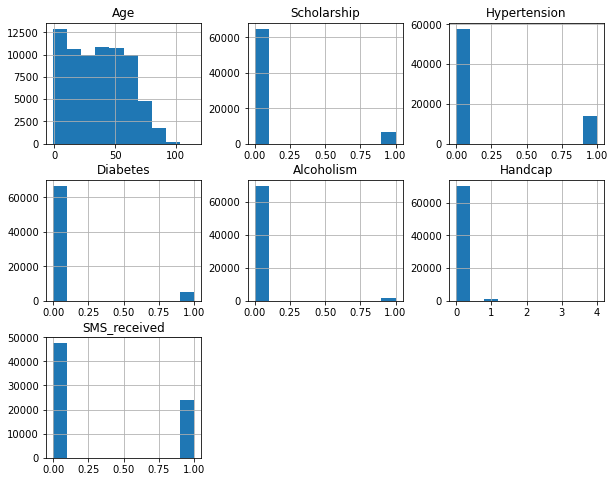

In [13]:
df.hist(figsize=(10,8));

> i explored the columns through a hist

In [14]:
attendant = df['No-show'] == 'No'
absent = df['No-show'] == 'Yes'
df[attendant].count(), df[absent].count()

(Gender           54154
 Age              54154
 Neighbourhood    54154
 Scholarship      54154
 Hypertension     54154
 Diabetes         54154
 Alcoholism       54154
 Handcap          54154
 SMS_received     54154
 No-show          54154
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No-show          17663
 dtype: int64)

> i divided the data into 2 sections attendant and absent

### What are the age of the most people present?

In [15]:
df[attendant].Age.mean() , df[absent].Age.mean()

(37.228459578239836, 34.37626677234898)

>i found that the average age of the attendants is 37 years old and for the absents is 34 years old

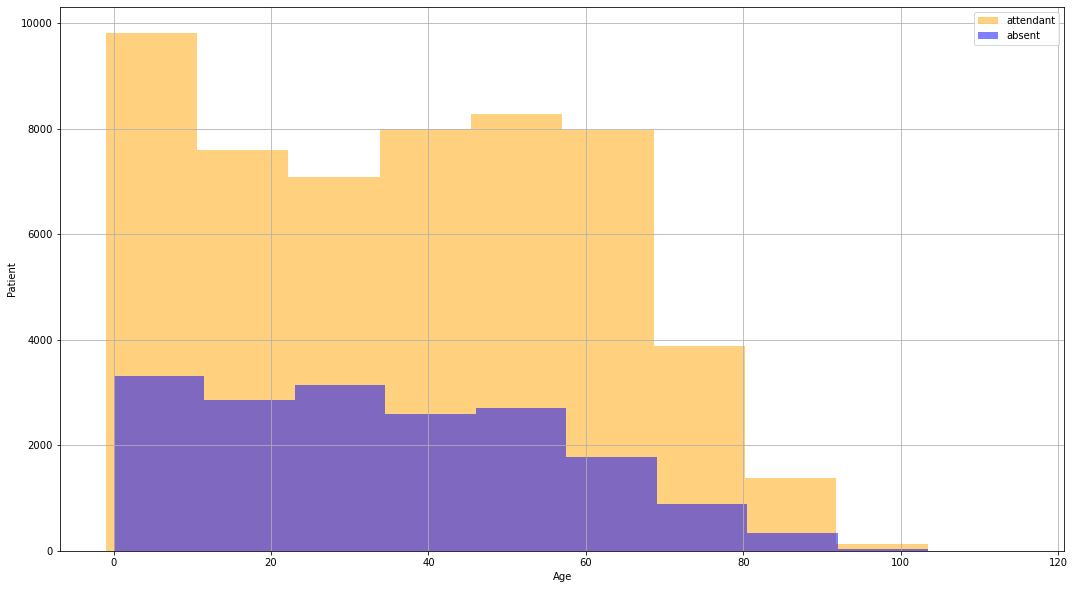

In [16]:
def patient_Age(df,col_name,attendant,absent):
    plt.figure(figsize = (18,10))
    df[col_name][attendant].hist(stacked=True, alpha = 0.5 , bins = 10 ,color = 'orange' ,label='attendant')
    df[col_name][absent].hist(stacked=True, alpha = 0.5 ,bins= 10, color = 'blue' ,label='absent')
    plt.legend();
    plt.xlabel('Age')
    plt.ylabel('Patient')
patient_Age(df,'Age',attendant,absent)    

>i compared the data to determine which age category attends the most and found that the first age category is from 0 to 10 years old and the second is from 45 to 55 years old. and the one that had an appointment but was a no-show was from 0 to 10 years old and the second one was from 25 to 35 years old.

### What are the gender of the most people present?

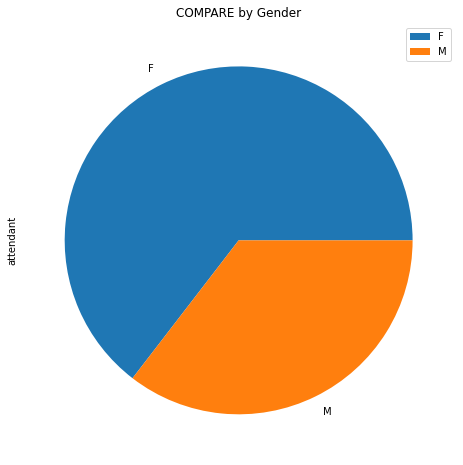

In [17]:
def patient_id(df,col_name,attendant,absent):
    plt.figure(figsize=(16,8))
    df[col_name][attendant].value_counts().plot(title= 'COMPARE by Gender',kind = 'pie', label = 'attendant')
    plt.legend();
patient_id(df,'Gender',attendant,absent)    

> females attend more than males

### Do the attendants have a scholarship ?

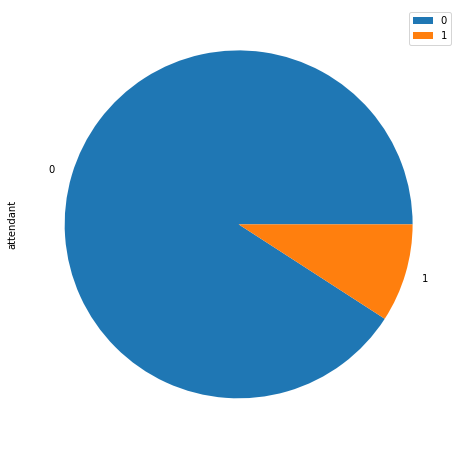

In [18]:
plt.figure(figsize=(16,8))
df.Scholarship[attendant].value_counts().plot(kind = 'pie', label = 'attendant')
plt.legend();

> most people who don't have a scholarship attended.

### Do the attendants suffer from alcoholism ?

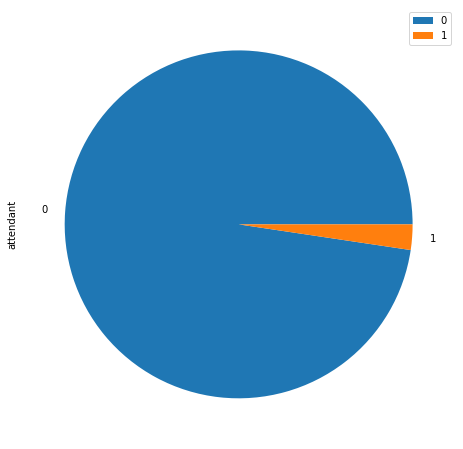

In [19]:
plt.figure(figsize=(16,8))
df.Alcoholism[attendant].value_counts().plot(kind = 'pie', label = 'attendant')
plt.legend();

> most people who don't suffer from alcoholism are the ones who attend

### Do the attendants suffer from hypertension?

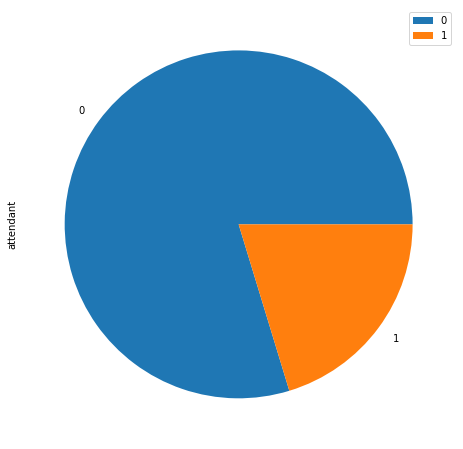

In [20]:
plt.figure(figsize=(16,8))
df.Hypertension[attendant].value_counts().plot(kind = 'pie', label = 'attendant')
plt.legend();

> most people who don't have hypertension are the ones who attend

### Do the attendants suffer from diabetes ?

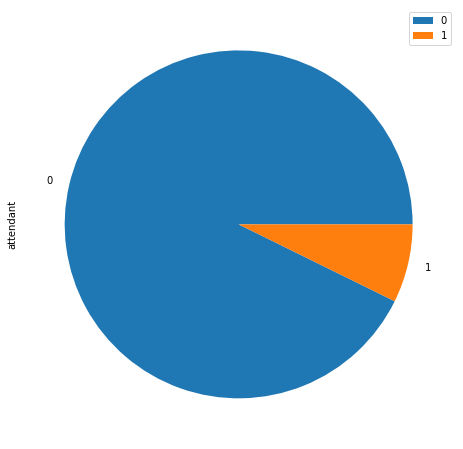

In [21]:
plt.figure(figsize=(16,8))
df.Diabetes[attendant].value_counts().plot(kind = 'pie',label = 'attendant')
plt.legend();

> most people who don't have diabetes are the ones who attend

### Do the attendants suffer from handicapped ?

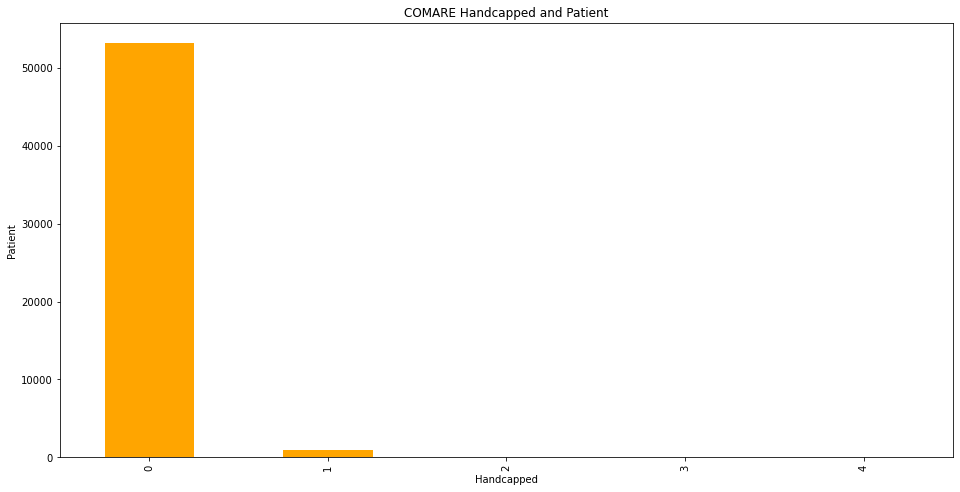

In [22]:
def patient_number(df,col_name,attendant,absent):
    plt.figure(figsize=(16,8))
    df[col_name][attendant].value_counts().plot.bar(color = 'orange', label = 'attendant')
    plt.title('COMARE Handcapped and Patient' )
    plt.xlabel('Handcapped')
    plt.ylabel('Patient');
patient_number(df,'Handcap',attendant,absent)    

> most people who aren't handicapped are the ones who attend

### Have the attendants received SMS?

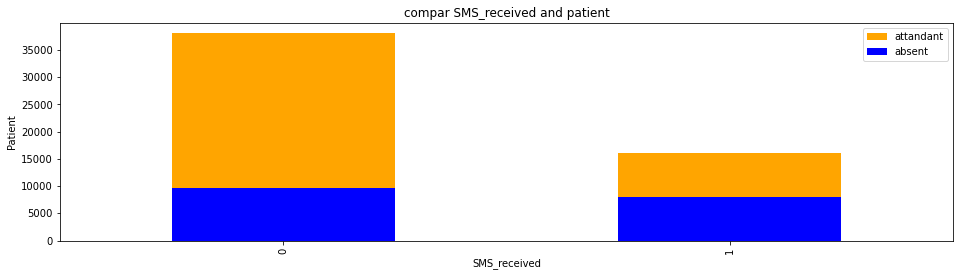

In [23]:
plt.figure(figsize = (16,4))
df.SMS_received[attendant].value_counts().plot.bar(color = 'orange' , label = 'attandant')
df.SMS_received[absent].value_counts().plot.bar(color = 'blue' , label = 'absent')
plt.legend()
plt.title('compar SMS_received and patient')
plt.xlabel('SMS_received')
plt.ylabel('Patient');

> most people who didn't receive an sms message are the ones who attended

   ### Has the environment of the neibourhood made any difference in attendance or absence?

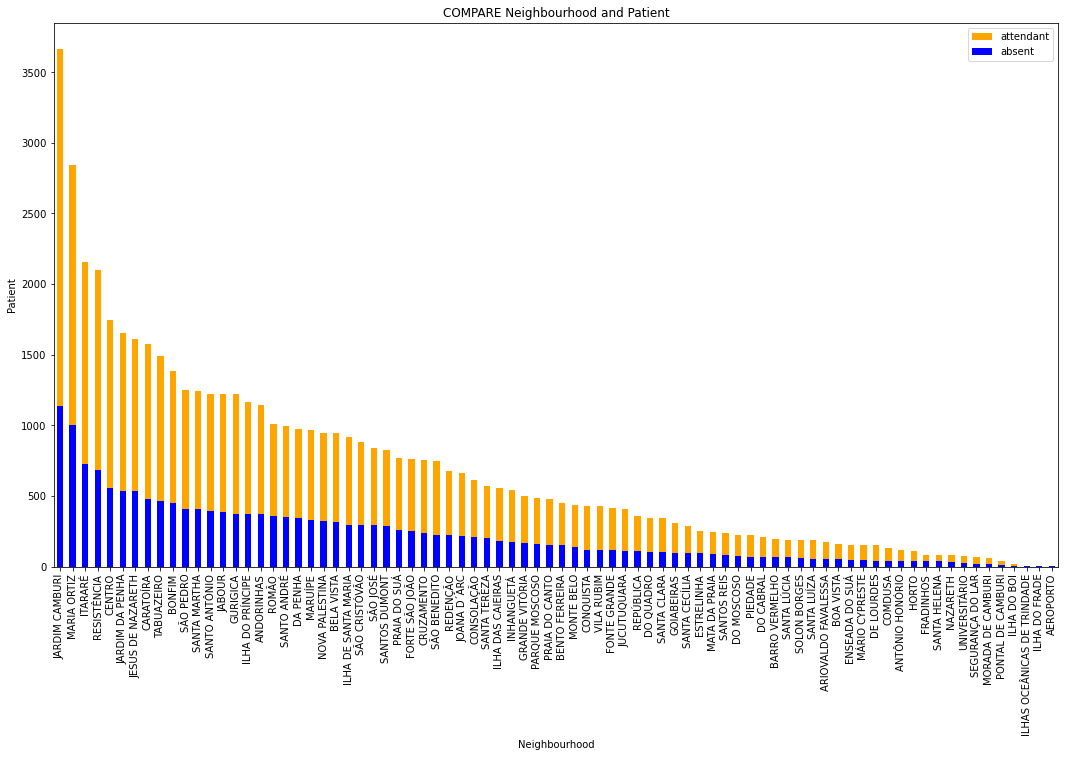

In [24]:
plt.figure(figsize = [18,10])
df.Neighbourhood[attendant].value_counts().plot.bar(color = 'orange' ,label='attendant')
df.Neighbourhood[absent].value_counts().plot.bar(color = 'blue' ,label='absent')
plt.legend()
plt.title('COMPARE Neighbourhood and Patient')
plt.xlabel('Neighbourhood')
plt.ylabel('Patient');

> the two cities that had both most attendance and absence are the first two cities 

###  Is the number of patients who attendand the same in every city?

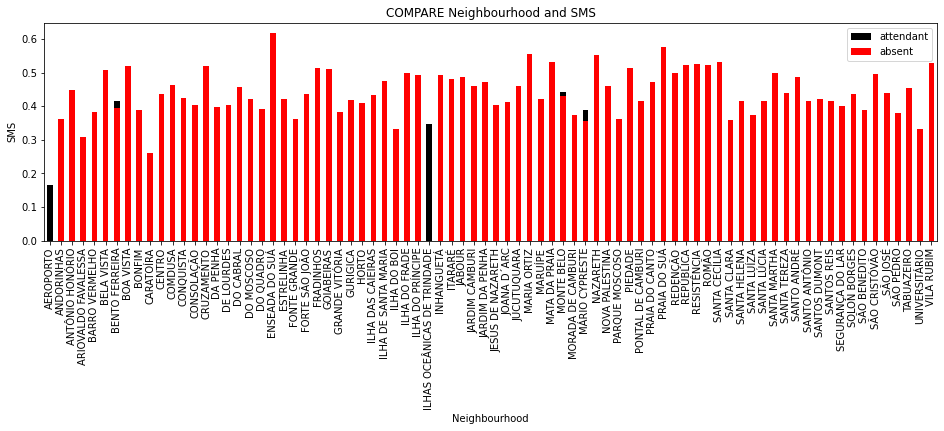

In [25]:
plt.figure(figsize = (16,4))
df[attendant].groupby(['Neighbourhood']).mean()['SMS_received'].plot.bar(stacked=True ,color = 'black' , label = 'attendant')
df[absent].groupby(['Neighbourhood']).mean()['SMS_received'].plot.bar(stacked=True ,color = 'red' , label = 'absent')
plt.legend()
plt.title('COMPARE Neighbourhood and SMS')
plt.xlabel('Neighbourhood')
plt.ylabel('SMS');

> there were only two cities where people received an sms message and attended

## conclusions 
>i noticed that the most attendants and also the most who scheduled an appointment and didn't show up were females ages 45 to 55 years old and their kids ages 0 to 10 years old, and this indicates we should maintain our care for these age categories because they are our main target.

> i found that most people who show up don't suffer from diabetes or hypertension and that means that people who do suffer from both could be a possible target later on.

> i found that most people who show up don't suffer from alcoholism or are handicapped.

>most people who show up don't have scholarship.

>I found that most people who didn't receive an sms message were the ones who did show up, and only 2 cities out of all the cities who receieved the sms messages showed up, and those 2 cities were the most cities that had both the least and the most attendance and absence. that indicates we should take more care of those 2 cities within our campaign because they're a good target for our business. as for the rest of the cities we need to improve our sms campaign in them.